In [25]:
import numpy as np

import matplotlib.pyplot as plt

In [26]:
k_armed_bandit = {1:[0.6,0.4],2:[0.8,0.2]}

In [27]:
def reward_fun(prob):
    return np.random.choice([0,1],p=prob)

In [28]:
def tao_softmax(tao,k_armed_bandit,T):
    K = len(k_armed_bandit)
    r = 0
    cum_r = [0]*T
    Q = [0]*K
    count = [0]*K
    
    for i in range(T):
        P = np.exp(np.array(Q)/tao)/ np.sum(np.exp(np.array(Q)/tao))
        
        k = np.random.choice(range(K),p=P)
        
        v = reward_fun(k_armed_bandit[k+1])
        r = r + v
        cum_r[i] = r
        
        Q[k] = (Q[k]*count[k] + v) /(count[k]+1)
        
        count[k] += 1
        
        cum_r[i] = r/(i+1)
        
    return r,cum_r
        

In [29]:
def epsilon_greedy(epsilon,k_armed_bandit,T):
    K = len(k_armed_bandit)
    r = 0
    cum_r = [0]*T
    Q = [0]*K
    count = [0]*K
    
    for i in range(T):
        if np.random.random() < epsilon:
            k = np.random.choice(range(K),p=[1/K]*K)
        else:
            k = np.argmax(Q)
        
        v = reward_fun(k_armed_bandit[k+1])
        r = r + v
        cum_r[i] = r
        
        Q[k] = (Q[k]*count[k] + v) /(count[k]+1)
        
        count[k] += 1
        
        cum_r[i] = r/(i+1)
        
    return r,cum_r
        

In [30]:
T = 5000
start = 100
r1, cum_r1 = epsilon_greedy(0.01,k_armed_bandit,T)
r2, cum_r2 = epsilon_greedy(0.1,k_armed_bandit,T)

r3, cum_r3 = epsilon_greedy(1,k_armed_bandit,T)
r4, cum_r4 = epsilon_greedy(0,k_armed_bandit,T)

r5, cum_r5 = tao_softmax(0.01,k_armed_bandit,T)
r6, cum_r6 = tao_softmax(0.1,k_armed_bandit,T)

r7, cum_r7 = ucb(k_armed_bandit,T)

In [31]:
def ucb(k_armed_bandit,T):
    K = len(k_armed_bandit)
    r = 0
    cum_r = [0]*T
    Q = [0]*K
    N = [0]*K
    count = [0]*K
    
    for i in range(T):
#         if np.random.random() < epsilon:
#             k = np.random.choice(range(K),p=[1/K]*K)
#         else:
#             k = np.argmax(Q)
            
        n = sum(N)+1
        
        uc = np.sqrt(2* np.log(n)/(1+np.array(N)))
        k = np.argmax(np.array(Q) + uc)
        
        v = reward_fun(k_armed_bandit[k+1])
        r = r + v
        cum_r[i] = r
        
        Q[k] = (Q[k]*count[k] + v) /(count[k]+1)
        
        count[k] += 1
        
        cum_r[i] = r/(i+1)
        
    return r,cum_r
    

In [32]:
ucb(k_armed_bandit,2)

(1, [0.0, 0.5])

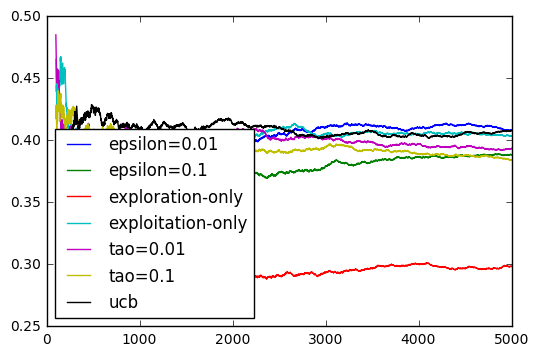

In [33]:
plt.plot(range(T)[start:],cum_r1[start:],range(T)[start:],\
         cum_r2[start:],range(T)[start:],cum_r3[start:],\
         range(T)[start:],cum_r4[start:],range(T)[start:],cum_r5[start:],\
         range(T)[start:],cum_r6[start:],range(T)[start:],cum_r7[start:])

plt.legend(labels = ['epsilon=0.01', 'epsilon=0.1','exploration-only','exploitation-only','tao=0.01','tao=0.1','ucb'], loc = 'best')
plt.show()

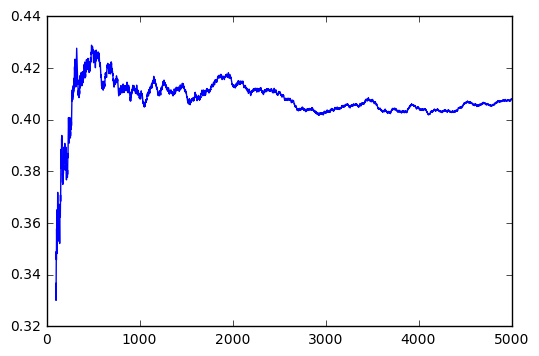

In [34]:
plt.plot(range(T)[start:],cum_r7[start:])
plt.show()

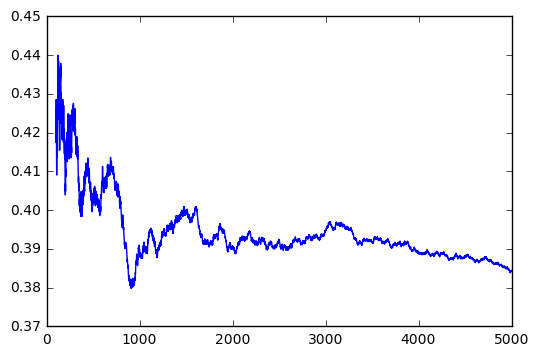

In [35]:
plt.plot(range(T)[start:],cum_r6[start:])
plt.show()

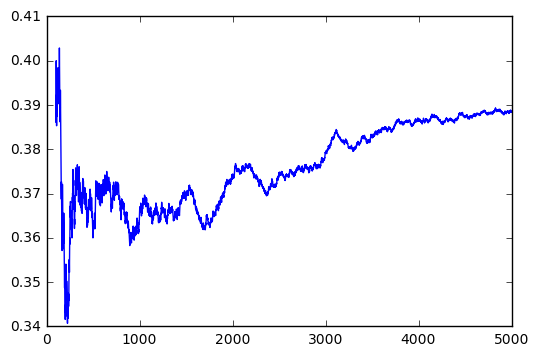

In [36]:
plt.plot(range(T)[start:],cum_r2[start:])
plt.show()

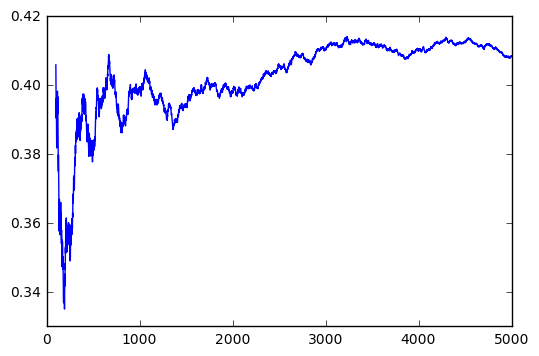

In [37]:
plt.plot(range(T)[start:],cum_r1[start:])
plt.show()